# Assignment 2 

In this assignment, you will try to find groups of similar customers in the dataset included in the uploaded folder. The dataset contains information about credit card behaviour of customers.  


### 1. Importing required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import silhouette_score

### 2. Reading the dataset

In [35]:
data = pd.read_csv('CC GENERAL.csv')
print(data.info())
print(data.describe())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### 3. Basic pre-processing

In [36]:
data = data.drop('CUST_ID', axis=1)
data.head()
data.fillna(method ='ffill', inplace = True)

### Scale the data 

In [37]:
# scaling 
normaliser = MinMaxScaler(feature_range=(0,1))
data = normaliser.fit_transform(data)

## 4. Finding groups

### Approach 1 [ 1.5 + 3.5 marks ] 

Plot the dendrograms for the above scaled dataset points. (hint: use scipy.cluster.hierarchy imported above). 
Plot using the following parameters:
1. ward
2. complete
3. average <br> 
Study the dendrograms and comment on the major differences between them.

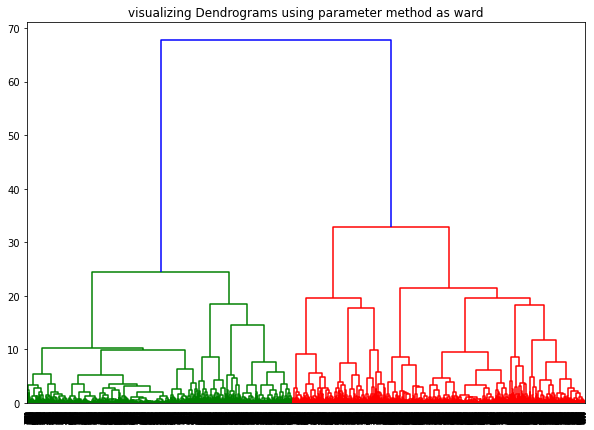

In [5]:
# dendrograms 
plt.figure(figsize=(10, 7))
plt.title("visualizing Dendrograms using parameter method as ward")
dend = sch.dendrogram(sch.linkage(data, method='ward'))

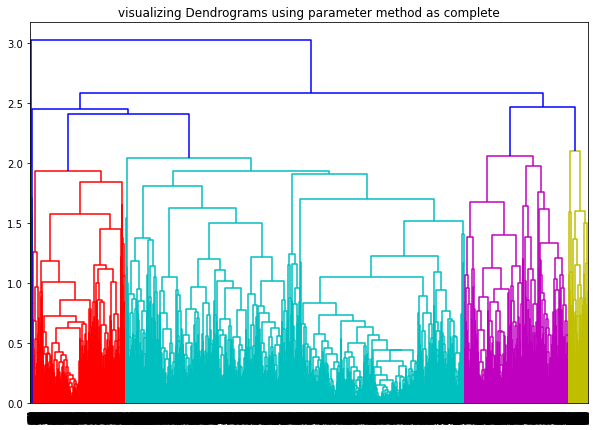

In [6]:
plt.figure(figsize=(10, 7))
plt.title("visualizing Dendrograms using parameter method as complete")
dend = sch.dendrogram(sch.linkage(data, method='complete'))

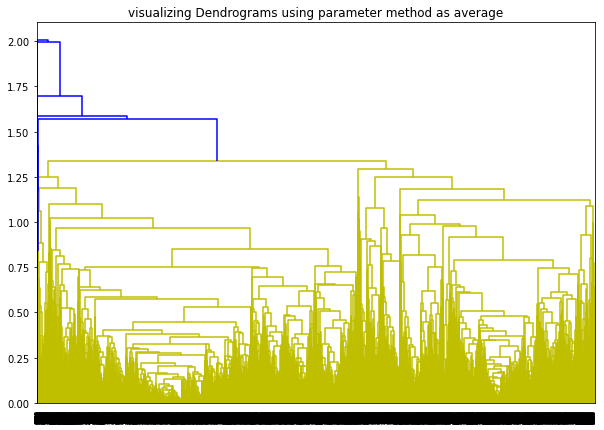

In [7]:
plt.figure(figsize=(10, 7))
plt.title("visualizing Dendrograms using parameter method as average")
dend = sch.dendrogram(sch.linkage(data, method='average'))

With the help of dendrograms obtained above, choose a suitable **k** for each linkage type. Experiment with different distance measures as mentioned below: <br>
1. Euclidean 
2. Manhattan 
3. Cosine <br> 
Calculate the cluster quality for each case and report your results in an organized, tabular format. The table should have the parameters used, cluster means and cluster quality.  

In [8]:
columns = ['Linkage','Distance_method','Cluster_count','Cluster_quality']
result = pd.DataFrame(columns = columns)

result.loc[0] = ['ward', 'euclidean',2,0]
result.loc[1] = ['complete', 'euclidean',2,0]
result.loc[2] = ['complete', 'manhattan',2,0]
result.loc[3] = ['complete', 'cosine',2,0]
result.loc[4] = ['average', 'euclidean',2,0]
result.loc[5] = ['average', 'manhattan',2,0]
result.loc[6] = ['average', 'cosine',2,0]

result.loc[7] = ['ward', 'euclidean',3,0]
result.loc[8] = ['complete', 'euclidean',3,0]
result.loc[9] = ['complete', 'manhattan',3,0]
result.loc[10] = ['complete', 'cosine',3,0]
result.loc[11] = ['average', 'euclidean',3,0]
result.loc[12] = ['average', 'manhattan',3,0]
result.loc[13] = ['average', 'cosine',3,0]

result.loc[14] = ['ward', 'euclidean',4,0]
result.loc[15] = ['complete', 'euclidean',4,0]
result.loc[16] = ['complete', 'manhattan',4,0]
result.loc[17] = ['complete', 'cosine',4,0]
result.loc[18] = ['average', 'euclidean',4,0]
result.loc[19] = ['average', 'manhattan',4,0]
result.loc[20] = ['average', 'cosine',4,0]

In [9]:
norm_dataframe = pd.DataFrame(data)
for i in range(len(result)) : 
    agg_clus = AgglomerativeClustering(n_clusters = result.loc[i, "Cluster_count"], linkage=result.loc[i, "Linkage"],
                                       affinity=result.loc[i, "Distance_method"])
    sil_score = silhouette_score(data, agg_clus.fit_predict(data))
    result.loc[i, "Cluster_quality"] = sil_score
    agg_clus.fit(data)
    norm_dataframe['clusters']=agg_clus.labels_
    print(norm_dataframe.groupby('clusters').mean())

                0        1         2         3         4         5         6   \
clusters                                                                        
0         0.070976  0.92694  0.034167  0.022962  0.032892  0.011886  0.835361   
1         0.094433  0.82271  0.005397  0.005277  0.002208  0.030522  0.111365   

                7         8         9         10        11        12  \
clusters                                                               
0         0.322494  0.660262  0.052779  0.015932  0.073201  0.156960   
1         0.070601  0.039481  0.131088  0.037926  0.005815  0.138984   

                13        14        15        16  
clusters                                          
0         0.037943  0.011091  0.231945  0.929456  
1         0.030025  0.011579  0.067780  0.908675  
                0         1         2         3         4         5   \
clusters                                                               
0         0.081214  0.876931  0.019031

                0         1         2         3         4         5   \
clusters                                                               
0         0.104976  0.897245  0.003097  0.003209  0.000937  0.036757   
1         0.048348  0.911133  0.028035  0.013777  0.036165  0.009828   
2         0.086034  0.834319  0.030755  0.025416  0.021005  0.014172   

                6         7         8         9         10        11  \
clusters                                                               
0         0.065058  0.044243  0.019982  0.160321  0.046917  0.003281   
1         0.910689  0.205300  0.794587  0.044203  0.012323  0.067756   
2         0.571193  0.344676  0.364387  0.059572  0.018005  0.056092   

                12        13        14        15        16  
clusters                                                    
0         0.135826  0.031001  0.012317  0.083955  0.900777  
1         0.140129  0.031483  0.010674  0.369921  0.869846  
2         0.165893  0.039022  0.01

                0         1         2         3         4         5   \
clusters                                                               
0         0.081735  0.877124  0.019703  0.013836  0.017890  0.020671   
1         0.273841  0.968687  0.692721  0.707517  0.228064  0.005492   
2         0.572650  1.000000  0.008808  0.003275  0.013264  1.000000   
3         0.592433  1.000000  0.255128  0.019381  0.520949  0.024204   

                6         7         8         9         10        11  \
clusters                                                               
0         0.489732  0.201777  0.363973  0.090134  0.026333  0.040480   
1         0.924074  0.885185  0.598148  0.012346  0.004517  0.443513   
2         0.583333  0.250000  0.500000  0.666667  1.000000  0.058659   
3         1.000000  0.166667  1.000000  0.018518  0.005420  0.641527   

                12        13        14        15        16  
clusters                                                    
0         0.

In [10]:
# Cluster mean values are printed in the above cell in the same order as like in the rows below.
result

,Linkage,Distance_method,Cluster_count,Cluster_quality
0,ward,euclidean,2,0.356759
1,complete,euclidean,2,0.392553
2,complete,manhattan,2,0.28985
3,complete,cosine,2,0.284704
4,average,euclidean,2,0.457327
5,average,manhattan,2,0.495558
6,average,cosine,2,0.273264
7,ward,euclidean,3,0.336342
8,complete,euclidean,3,0.23126
9,complete,manhattan,3,0.242713


### Approach 2 [ 3 marks] 
Solve the same problem using a density based approach. Experiment with the following values of eps and minpts:<br> 
1. eps = 0.1, min_pts = 5
2. eps = 0.5, min_pts = 3
3. eps = 0.8, min_pts = 5 <br>
Analyze the results and comment on how the clustering changes as the above parameters are varied. Report the cluster quality for all the cases using the same measure as used for approach 1. Report results in a tabular format with parameters used, number of noise and core points and cluster quality. 

In [22]:
# clustering 
db = DBSCAN(eps = 0.1, min_samples = 5).fit(data) 
labels = db.labels_ 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % silhouette_score(data, labels))

Estimated number of clusters: 62
Estimated number of noise points: 5032
Silhouette Coefficient: -0.480


In [23]:
db = DBSCAN(eps = 0.5, min_samples = 3).fit(data) 
labels = db.labels_ 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % silhouette_score(data, labels))

Estimated number of clusters: 1
Estimated number of noise points: 45
Silhouette Coefficient: 0.349


In [13]:
db = DBSCAN(eps = 0.8, min_samples = 5).fit(data) 
labels = db.labels_ 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % silhouette_score(data, labels))

Estimated number of clusters: 1
Estimated number of noise points: 6
Silhouette Coefficient: 0.421


In [40]:
db = DBSCAN(eps = 0.3, min_samples = 5).fit(data) 
labels = db.labels_ 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % silhouette_score(data, labels))

Estimated number of clusters: 3
Estimated number of noise points: 338
Silhouette Coefficient: 0.039


## 5. Visualization [ 2 marks ] 
To visualize the clusters, reduce the data to 2 dimensions using PCA. Make a scatterplot with different colours for each cluster obtained. Make one visualization each for approach 1 and 2 (the parameters which gave the best cluster quality for each). 

Text(0.5, 1.0, 'DBSCAN')

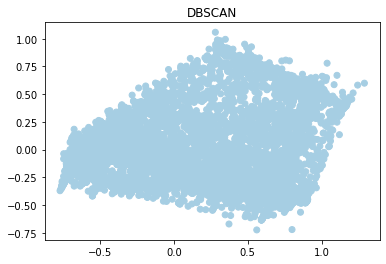

In [45]:
# visualization - reduce to two dimensions using PCA and make a scatterplot 
pca = PCA(n_components = 2) 
new_data = pca.fit_transform(data) 
# new_data = pd.DataFrame(new_data) 
# new_data.columns = ['X', 'Y'] 
# print(new_data.head()) 

db = DBSCAN(eps=0.3, min_samples=5)
db.fit(new_data)
# labels = db.labels_ 
# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# n_noise_ = list(labels).count(-1)
# print('Estimated number of clusters: %d' % n_clusters_)

y_pred = db.fit_predict(new_data)
plt.scatter(new_data[:,0], new_data[:,1],c=y_pred, cmap='Paired')
plt.title("DBSCAN")

Text(0.5, 1.0, 'Hierarchical')

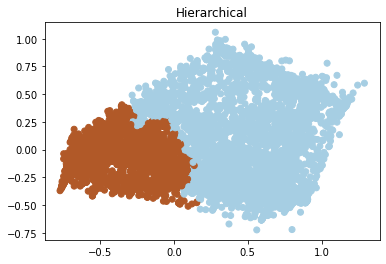

In [44]:
agg_clus = AgglomerativeClustering(n_clusters = 2, linkage='average',
                                       affinity='manhattan')
y_pred = agg_clus.fit_predict(new_data)
plt.scatter(new_data[:,0], new_data[:,1],c=y_pred, cmap='Paired')
plt.title("Hierarchical")